Name: Başak Güney

ID: 211101051

Course: BIL570 /BIL470

## Real / Fake Job Posting Prediction

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.util import ngrams
import spacy 
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Loading Dataset

In [140]:
# Loading dataset
data = pd.read_csv('fake_job_postings.csv')

# Exploratory Data Analysis (EDA)

In [141]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [142]:
data.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [143]:
data.shape

(17880, 18)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [145]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# Displaying number of duplcates.
data.duplicated().sum()

0

In [147]:
# Calling object columns
object_columns_data = data.select_dtypes(include='object')
object_columns_data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [148]:
# Calling numerical columns
int_columns_data = data.select_dtypes(include='int')
int_columns_data.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,1,0,0
1,2,0,1,0,0
2,3,0,1,0,0
3,4,0,1,0,0
4,5,0,1,1,0


In [149]:
data['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [150]:
real = data[data['fraudulent'] == 0]
real.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [151]:
fake = data[data['fraudulent'] == 1]
fake.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1


Text(0.5, 1.0, 'Counts of Fraudulent vs Non-Fraudulent')

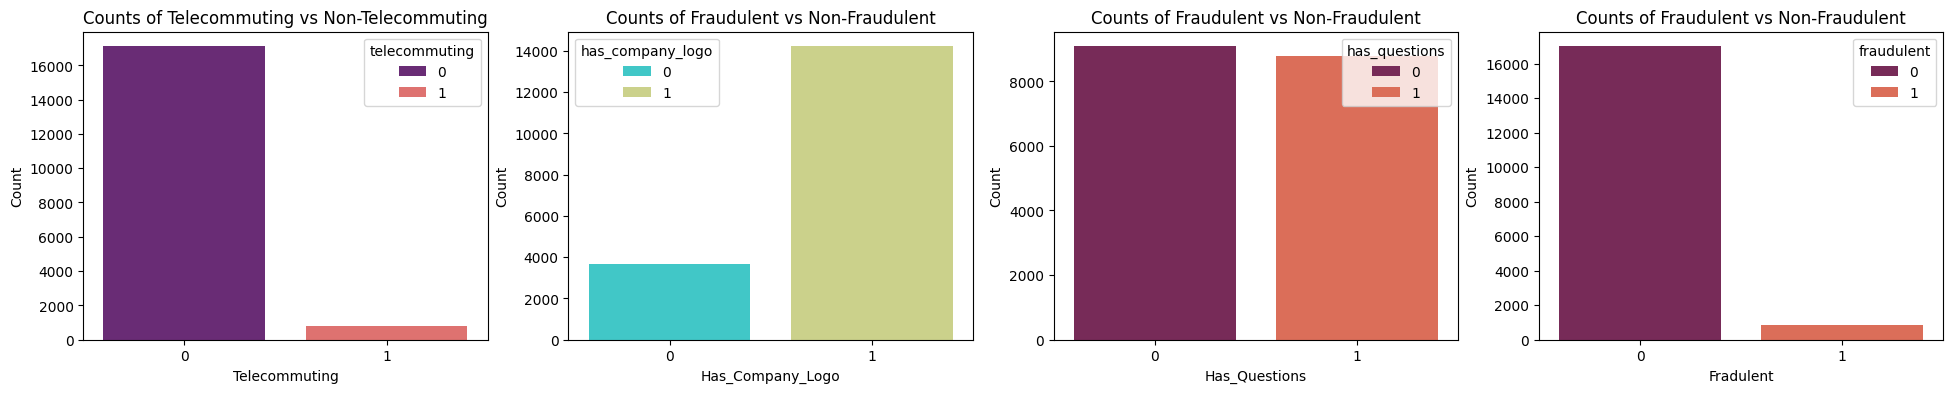

In [152]:

fraudulent_counts = data['fraudulent'].value_counts()
telecommuting_counts = data['telecommuting'].value_counts()
has_company_logo_counts = data['has_company_logo'].value_counts()
has_questions_counts = data['has_questions'].value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 4))


sns.barplot(x=telecommuting_counts.index, y=telecommuting_counts.values, palette='magma', ax=ax1, hue=telecommuting_counts.index)
ax1.set_xlabel('Telecommuting')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Telecommuting vs Non-Telecommuting')



sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values, palette='rainbow', ax=ax2, hue=has_company_logo_counts.index)
ax2.set_xlabel('Has_Company_Logo')
ax2.set_ylabel('Count')
ax2.set_title('Counts of Fraudulent vs Non-Fraudulent')


sns.barplot(x=has_questions_counts.index, y=has_questions_counts.values, palette='rocket', ax=ax3, hue=has_questions_counts.index)
ax3.set_xlabel('Has_Questions')
ax3.set_ylabel('Count')
ax3.set_title('Counts of Fraudulent vs Non-Fraudulent')



sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values, palette='rocket', ax=ax4, hue=fraudulent_counts.index)
ax4.set_xlabel('Fradulent')
ax4.set_ylabel('Count')
ax4.set_title('Counts of Fraudulent vs Non-Fraudulent')

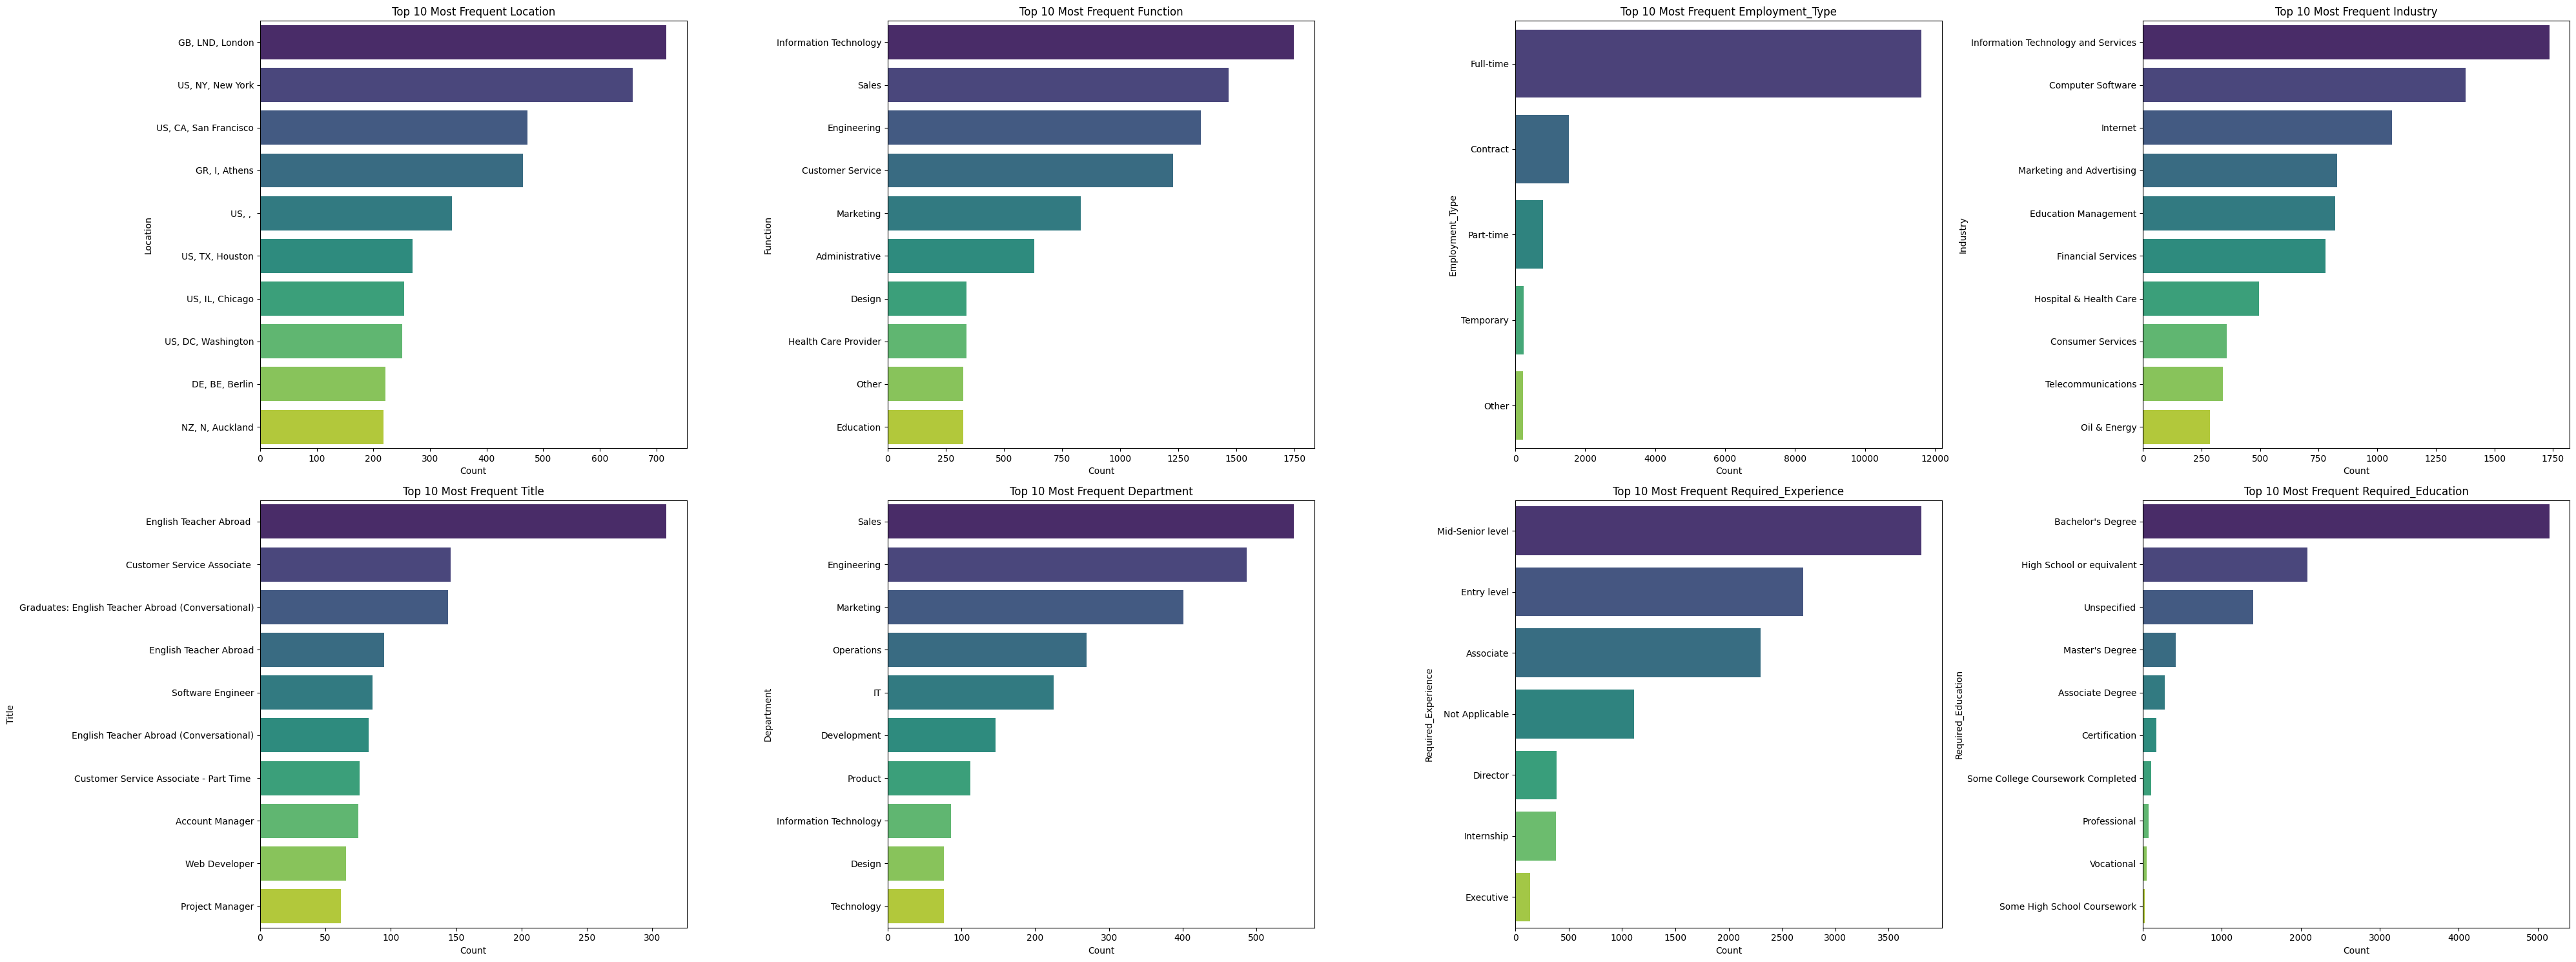

In [153]:
title_counts = data['title'].value_counts()
top_10_title = title_counts.head(10)


department_counts = data['department'].value_counts()
top_10_departmant = department_counts.head(10)

industry_counts = data['industry'].value_counts()
top_10_industry = industry_counts.head(10)

required_experience_counts = data['required_experience'].value_counts()
top_10_required_experience = required_experience_counts.head(10)


required_education_counts = data['required_education'].value_counts()
top_10_required_education = required_education_counts.head(10)

employment_type_counts = data['employment_type'].value_counts()
top_10_employment_type = employment_type_counts.head(10)


location_counts = data['location'].value_counts()
top_10_location = location_counts.head(10)

function_counts = data['function'].value_counts()
top_10_function = function_counts.head(10)


fig, axes = plt.subplots(2, 4, figsize=(40, 15))

sns.barplot(y=top_10_location.index, x=top_10_location.values,hue=top_10_location.index, palette='viridis', ax=axes[0][0])
axes[0][0].set_ylabel('Location')
axes[0][0].set_xlabel('Count')
axes[0][0].set_title('Top 10 Most Frequent Location')


sns.barplot(y=top_10_function.index, x=top_10_function.values,hue=top_10_function.index, palette='viridis', ax=axes[0][1])
axes[0][1].set_ylabel('Function')
axes[0][1].set_xlabel('Count')
axes[0][1].set_title('Top 10 Most Frequent Function')


sns.barplot(y=top_10_employment_type.index, x=top_10_employment_type.values,hue=top_10_employment_type.index, palette='viridis', ax=axes[0][2])
axes[0][2].set_ylabel('Employment_Type')
axes[0][2].set_xlabel('Count')
axes[0][2].set_title('Top 10 Most Frequent Employment_Type')


sns.barplot(y=top_10_industry.index, x=top_10_industry.values, hue=top_10_industry.index, palette='viridis', ax=axes[0][3])
axes[0][3].set_ylabel('Industry')
axes[0][3].set_xlabel('Count')
axes[0][3].set_title('Top 10 Most Frequent Industry')



sns.barplot(y=top_10_title.index, x=top_10_title.values,hue=top_10_title.index, palette='viridis', ax=axes[1][0])
axes[1][0].set_ylabel('Title')
axes[1][0].set_xlabel('Count')
axes[1][0].set_title('Top 10 Most Frequent Title')


sns.barplot(y=top_10_departmant.index, x=top_10_departmant.values,hue=top_10_departmant.index, palette='viridis', ax=axes[1][1])
axes[1][1].set_ylabel('Department')
axes[1][1].set_xlabel('Count')
axes[1][1].set_title('Top 10 Most Frequent Department')


sns.barplot(y=top_10_required_experience.index, x=top_10_required_experience.values,hue=top_10_required_experience.index, palette='viridis', ax=axes[1][2])
axes[1][2].set_ylabel('Required_Experience')
axes[1][2].set_xlabel('Count')
axes[1][2].set_title('Top 10 Most Frequent Required_Experience')



sns.barplot(y=top_10_required_education.index, x=top_10_required_education.values,hue=top_10_required_education.index, palette='viridis', ax=axes[1][3])
axes[1][3].set_ylabel('Required_Education')
axes[1][3].set_xlabel('Count')
axes[1][3].set_title('Top 10 Most Frequent Required_Education')


plt.tight_layout()

plt.show()

# Preprocessing

In [154]:
# Dropping job_id column
data = data.drop(columns=['job_id'])

In [155]:
# Filling null entries with space. 
data.fillna(" ", inplace=True)

In [156]:
# Concatinating text columns
concatinated_column = ['title', 'location', 'department', 'salary_range', 'company_profile',
                       'description', 'requirements', 'benefits', 'employment_type',
                       'required_experience', 'required_education', 'industry', 'function']

data['job_posting'] = data[concatinated_column].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
data = data[['job_posting', 'fraudulent']].copy()

In [157]:
data.head()

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Spo...",0


In [159]:
# Text cleaning
def preprocess_text(text):
    text = text.lower()     # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)     # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)      # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)         # Remove punctuation
    text = re.sub(r'\d', '', text)        # Remove digits
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)
    
    return text
# Apply the combined function to the 'job_posting' column
data['job_posting'] = data['job_posting'].apply(preprocess_text)

## Tokenization

In [160]:
# Tokenize each job posting into words
data['job_posting_tokens'] = data['job_posting'].apply(word_tokenize)
# Tokenize each job posting into sentences
data['job_posting_sentences'] = data['job_posting'].apply(sent_tokenize)

In [161]:
data.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...


## POS(Parts-Of-Speech) Tagging

In [162]:
def pos_tagging(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens
# Apply POS tagging to each sentence in 'job_posting_sentences' column
data['job_posting_pos_tagged'] = data['job_posting_sentences'].apply(lambda x: [pos_tagging(sentence) for sentence in x])

In [163]:
data.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us..."


## N-Grams

In [164]:
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))
# Define the value of n for the n-grams
n = 2 
# Apply n-gram generation to the 'job_posting_tokens' column
data['job_posting_ngrams'] = data['job_posting_tokens'].apply(lambda x: generate_ngrams(x, n))

In [165]:
data.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged,job_posting_ngrams
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n...","[(marketing, intern), (intern, us), (us, ny), ..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ...","[(customer, service), (service, cloud), (cloud..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi...","[(commissioning, machinery), (machinery, assis..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,...","[(account, executive), (executive, washington)..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us...","[(bill, review), (review, manager), (manager, ..."


## Named Entity Recognition

In [166]:
nlp = spacy.load('en_core_web_sm')
# Function to perform Named Entity Recognition
def named_entity_recognition(text):
    doc = nlp(text)
    entities = [(ent.text,ent.label_) for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']]
    return entities

# Apply NER function to job_description column
data['job_posting_ner'] = data['job_posting'].apply(named_entity_recognition)

In [167]:
data.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged,job_posting_ngrams,job_posting_ner
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n...","[(marketing, intern), (intern, us), (us, ny), ...","[(new york, GPE), (placewe, GPE), (danny meyer..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ...","[(customer, service), (service, cloud), (cloud...","[(sony, ORG), (london, GPE), (tokyo, GPE), (si..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi...","[(commissioning, machinery), (machinery, assis...","[(houston, GPE)]"
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,...","[(account, executive), (executive, washington)...","[(washington, GPE), (us, GPE), (washington, GPE)]"
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us...","[(bill, review), (review, manager), (manager, ...","[(florida, GPE), (tx department itemization, O..."


# Vectorizing The Text Data

In [170]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['job_posting_tokens'], data['fraudulent'], test_size=0.2, random_state=42)

# Flatten the list of lists into a single list of strings
X_train_flattened = [' '.join(sublist) for sublist in X_train]

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_flattened)

# Flatten the list of lists into a single list of strings for test data
X_test_flattened = [' '.join(sublist) for sublist in X_test]
X_test_vec = vectorizer.transform(X_test_flattened)


In [171]:
# Ensure the shape of X_train_vec matches the number of samples in X_train
print("Shape of X_train_vec:", X_train_vec.shape)
print("Number of samples in X_train:", X_train.shape[0])

# Ensure the shape of X_test_vec matches the number of samples in X_test
print("Shape of X_test_vec:", X_test_vec.shape)
print("Number of samples in X_test:", X_test.shape[0])


Shape of X_train_vec: (14304, 138280)
Number of samples in X_train: 14304
Shape of X_test_vec: (3576, 138280)
Number of samples in X_test: 3576


# Splitting

In [172]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_vec, y_train, test_size=0.2, random_state=42)